### imports

In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
from wordcloud import WordCloud

In [6]:
import matplotlib.pyplot as plt

In [7]:
import nltk

In [8]:
# download de todos os tipos, demora bastante com 'all'
#nltk.download('all')

In [9]:
import seaborn as sns

In [10]:
from string import punctuation

In [11]:
import unidecode

### AULA 1

### code

In [12]:
resenha = pd.read_csv("res/imdb-reviews-pt-br.csv")

In [13]:
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [14]:
resenha.shape

(49459, 4)

In [15]:
treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt, resenha.sentiment, random_state=42)

In [16]:
treino.sample(3)

38684    Acho que esse filme seria mais agradável se to...
12455    Para o queijo do final dos anos 80, isso realm...
44816    Então, Todd Sheets afirmou certa vez que consi...
Name: text_pt, dtype: object

In [17]:
classe_treino.sample(3)

16042    pos
30394    neg
25519    neg
Name: sentiment, dtype: object

In [18]:
resenha.text_pt[189]

'Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.'

In [19]:
resenha.text_pt[49002]

'Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maior que você

In [20]:
resenha.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [21]:
classificacao = resenha['sentiment'].replace(['neg','pos'],[0,1])

In [22]:
resenha['classificacao'] = classificacao

In [23]:
resenha.sample()

,id,text_en,text_pt,sentiment,classificacao
17711,17713,Just exactly HOW director John Madden come to ...,Exatamente exatamente como o diretor John Madd...,pos,1


### AULA 2

teste com a funcao

In [24]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(
                            bag_of_words, texto[coluna_classificacao], random_state=42)
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)

In [25]:
print(classificar_texto(resenha, 'text_pt', 'classificacao'))

0.6583097452486858


### AULA 3

In [26]:
todas_palavras = ' '.join([texto for texto in resenha.text_pt])

In [27]:
len(todas_palavras)

63448424

In [28]:
texto_positivo = resenha.loc[resenha.sentiment == 'pos']

In [29]:
texto_negativo = resenha.loc[resenha.sentiment == 'neg']

In [30]:
def gera_nuvem_palavras(df, coluna):
    todas_palavras = ' '.join([texto for texto in df[coluna]])
    nuvem_palavras = WordCloud(
        width=800,
        height=500,
        max_font_size=110,
        collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

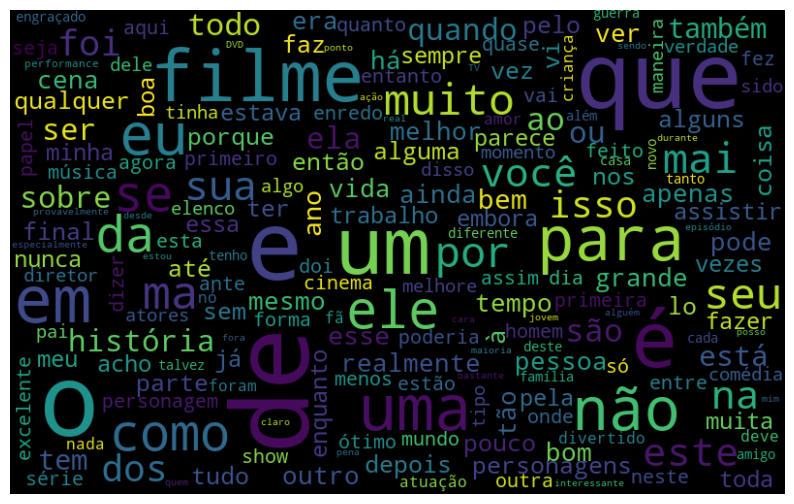

In [31]:
%matplotlib inline
gera_nuvem_palavras(texto_positivo, 'text_pt')

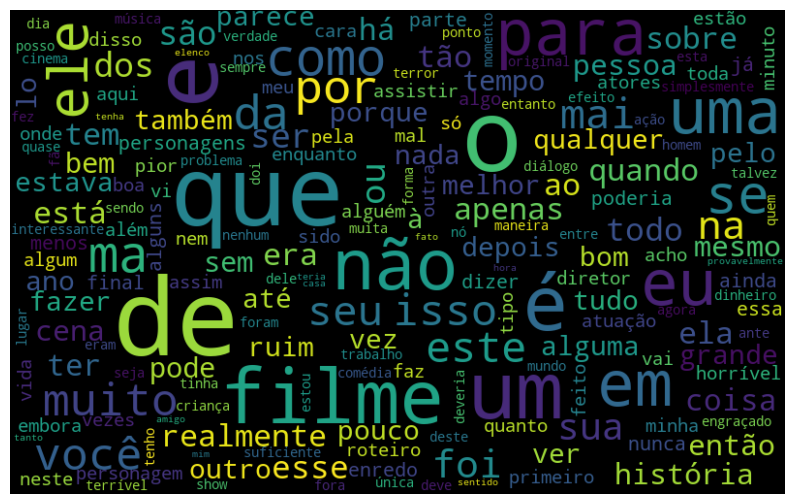

In [32]:
%matplotlib inline
gera_nuvem_palavras(texto_negativo, 'text_pt')

### AULA 4

###### **teste nltk**

In [33]:
frase = ['um filme bom','um filme ruim']

In [34]:
frequencia = nltk.FreqDist(frase)

In [35]:
frequencia

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

In [36]:
frase = 'Bem vindo ao mundo do PLN!'

In [37]:
token_espaco = nltk.tokenize.WhitespaceTokenizer()

In [38]:
token_frase = token_espaco.tokenize(frase)

In [39]:
token_frase

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']

###### **token todas_palavras**

In [40]:
token_espaco = nltk.tokenize.WhitespaceTokenizer()

In [41]:
token_frase = token_espaco.tokenize(todas_palavras)

In [42]:
frequencia = nltk.FreqDist(token_frase)

In [43]:
len(frequencia)

348285

In [44]:
df_frequencia = pd.DataFrame(
    {
        'palavra':list(frequencia.keys()),
        'frequencia':list(frequencia.values())
    })

In [45]:
df_frequencia.sample(3)

,palavra,frequencia
60309,quinta,59
16339,bogan.,1
127959,Balagueró,2


In [46]:
df_frequencia.nlargest(columns='frequencia', n=10)

,palavra,frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


### AULA 5

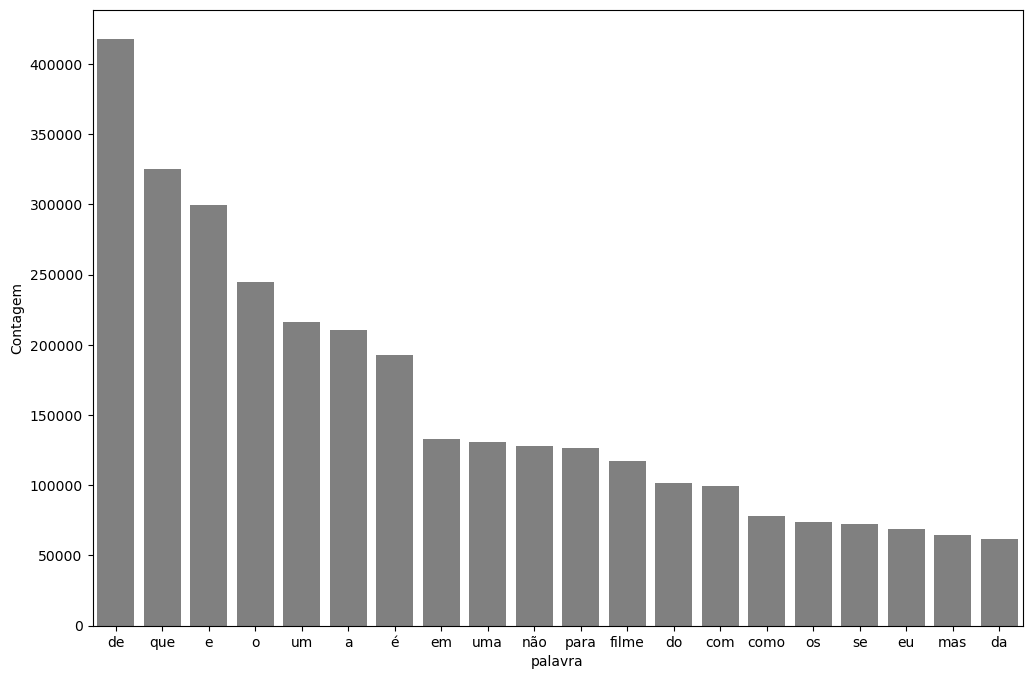

In [47]:
plt.figure(figsize=(12,8))
#ax = sns.barplot(data=df_frequencia, x='palavra', y='frequencia', color='gray')
ax = sns.barplot(data=df_frequencia.nlargest(columns='frequencia', n=20), x='palavra', y='frequencia', color='gray')
ax.set(ylabel='Contagem')
plt.show()

In [48]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_espaco = nltk.tokenize.WhitespaceTokenizer()
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame(
        {'palavra':list(frequencia.keys()),'frequencia':list(frequencia.values())}
    ).nlargest(columns='frequencia', n=quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data=df_frequencia, x='palavra', y='frequencia', color='gray')
    ax.set(ylabel='Contagem')
    plt.show()

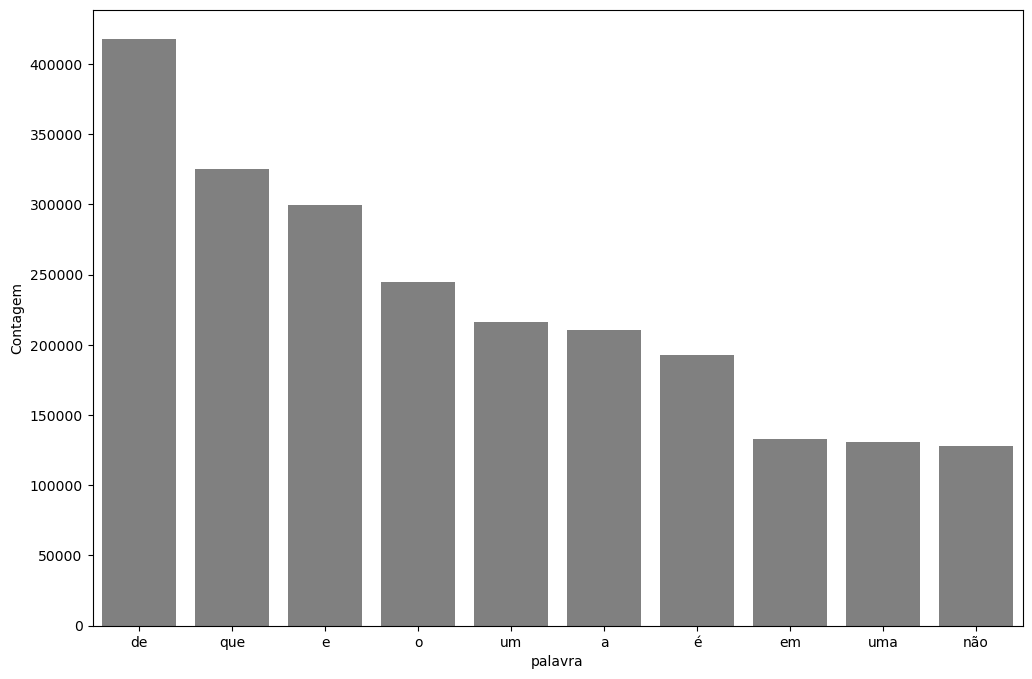

In [49]:
pareto(resenha, 'text_pt', 10)

##### **stopwords**

In [50]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

In [51]:
type(palavras_irrelevantes)

list

In [52]:
len(palavras_irrelevantes)

207

In [53]:
palavras_irrelevantes[:5]

['a', 'à', 'ao', 'aos', 'aquela']

In [54]:
frase_processada = list()
for opiniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_1'] = frase_processada

In [55]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [56]:
classificar_texto(resenha, 'tratamento_1', 'classificacao')

0.6811160533764659

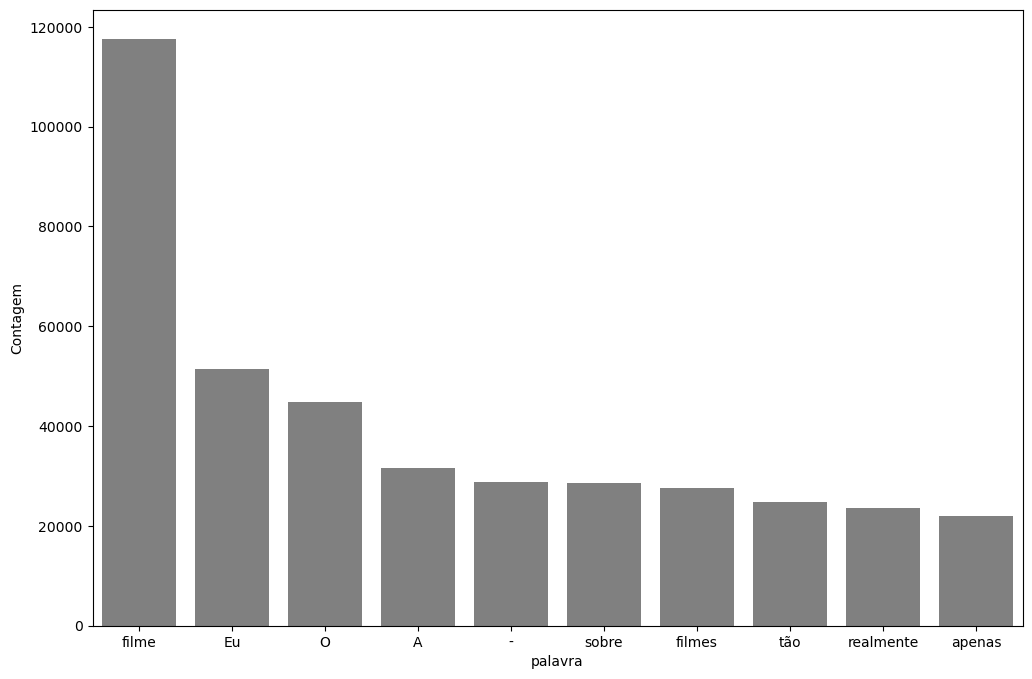

In [57]:
pareto(resenha, 'tratamento_1', 10)

# PARTE 2

### AULA 2

In [58]:
frase = 'ola, mundo!'

In [59]:
token_pontuacao = nltk.tokenize.WordPunctTokenizer()

In [60]:
token_frase = token_pontuacao.tokenize(frase)

In [61]:
token_frase

['ola', ',', 'mundo', '!']

### AULA 3

In [62]:
pontuacao = [c for c in punctuation]

In [63]:
pontuacao_stopwords = pontuacao + palavras_irrelevantes

In [64]:
frase_processada = [' '.join([p for p in token_pontuacao.tokenize(op) if p not in pontuacao_stopwords]) for op in resenha['tratamento_1']]

In [65]:
len(frase_processada)

49459

In [66]:
resenha['tratamento_2'] = frase_processada

In [67]:
resenha.head(2)

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...


In [68]:
resenha['tratamento_1'][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [69]:
resenha['tratamento_2'][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

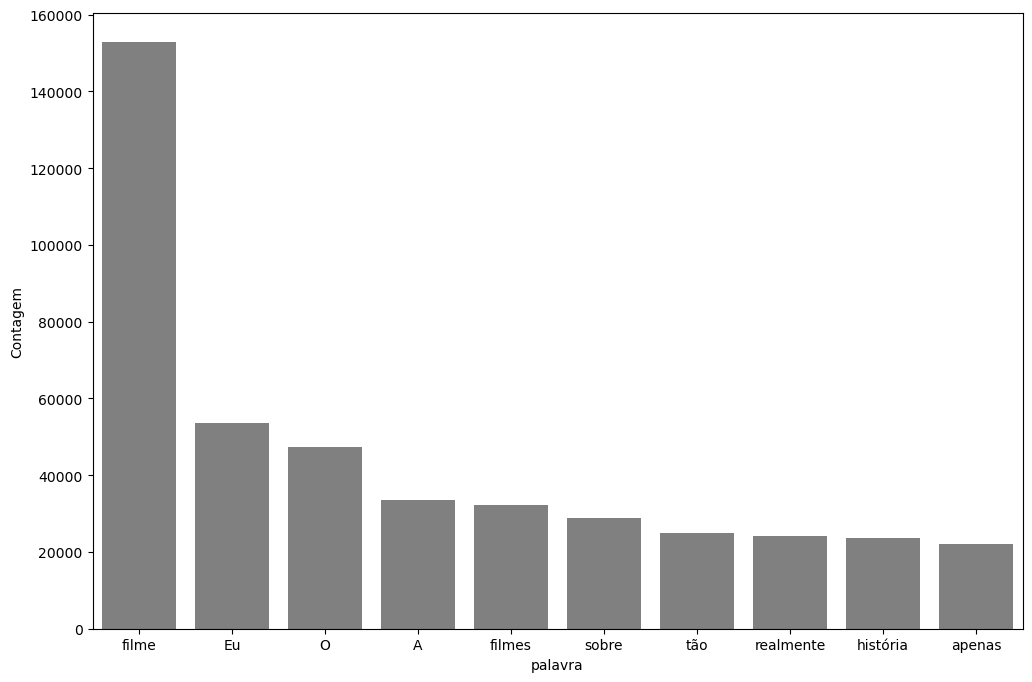

In [70]:
pareto(resenha, 'tratamento_2', 10)

### AULA 3

In [71]:
acentos = 'ótimo péssimo não é tão'

In [72]:
teste = unidecode.unidecode(acentos)
teste

'otimo pessimo nao e tao'

In [73]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha['tratamento_2']]

In [75]:
stopwords_sem_acentos = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

### AULA 4

In [77]:
resenha['tratamento_3'] = sem_acentos

In [80]:
frase_processada = [' '.join([p for p in token_pontuacao.tokenize(op) if p not in pontuacao_stopwords]) for op in resenha['tratamento_3']]

In [81]:
resenha['tratamento_3'] = frase_processada

In [83]:
acuracia_tratamento_3 = classificar_texto(resenha, 'tratamento_3', 'classificacao')

In [84]:
acuracia_tratamento_3

0.6887990295188031

In [85]:
texto_positivo = resenha.loc[resenha.sentiment == 'pos']

In [86]:
texto_negativo = resenha.loc[resenha.sentiment == 'neg']

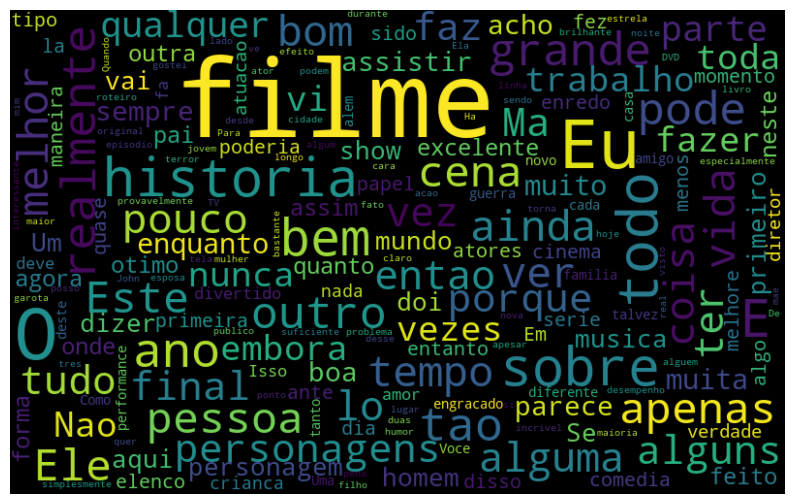

In [89]:
%matplotlib inline
gera_nuvem_palavras(texto_positivo, 'tratamento_3')

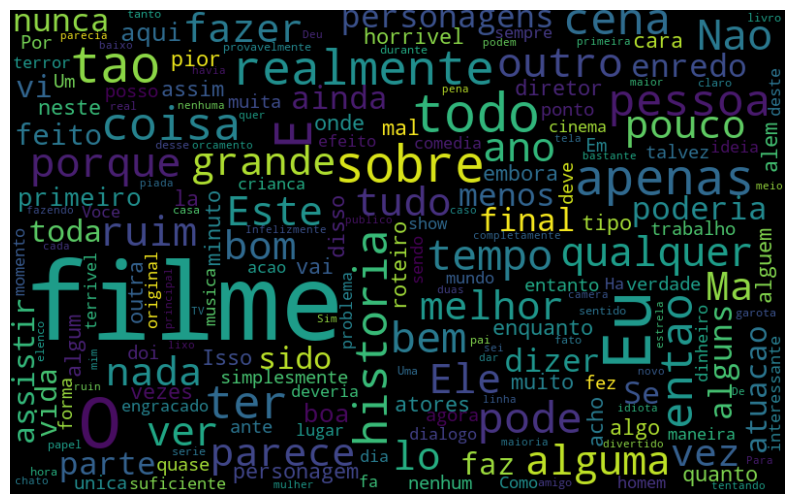

In [90]:
%matplotlib inline
gera_nuvem_palavras(texto_negativo, 'tratamento_3')

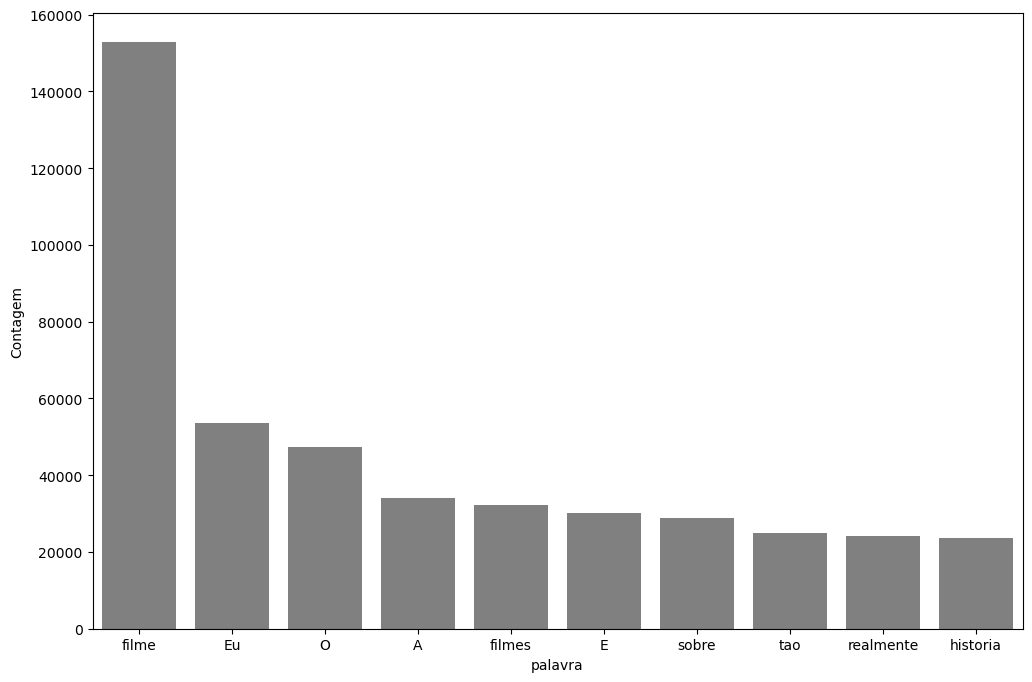

In [91]:
pareto(resenha, 'tratamento_3', 10)